In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

inception_weights_path = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/inception_v3_weights_tf_dim_ordering_tf_kernels.h5'

In [3]:
!git clone  https://github.com/laxmimerit/male-female-face-dataset.git

Cloning into 'male-female-face-dataset'...
remote: Enumerating objects: 58657, done.
remote: Total 58657 (delta 0), reused 0 (delta 0), pack-reused 58657
Receiving objects: 100% (58657/58657), 261.44 MiB | 34.97 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (58659/58659), done.


In [4]:
epochs = 20
lr = 1e-3
batch_size = 128
data = []
labels = []

In [5]:
size = 224


In [6]:
train_datagen = ImageDataGenerator(horizontal_flip=True, 
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   zoom_range=0.3,
                                   rotation_range=20,
                                   rescale=1/255)

In [7]:
test_gen = ImageDataGenerator(rescale=1/255)

In [8]:
target_size = (size, size)

In [9]:
target_size

(224, 224)

In [10]:
train_generator = train_datagen.flow_from_directory(directory ='/content/male-female-face-dataset/Training',
                                  target_size = target_size,
                                  batch_size = batch_size,
                                  class_mode = 'binary')

Found 47009 images belonging to 2 classes.


In [11]:
validation_generator = test_gen.flow_from_directory(directory ='/content/male-female-face-dataset/Validation',
                                  target_size = target_size,
                                  batch_size = batch_size,
                                  class_mode = 'binary')

Found 11649 images belonging to 2 classes.


In [12]:
train_generator.class_indices

{'female': 0, 'male': 1}

In [13]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [14]:
len(train_generator.classes)

47009

In [15]:
model = Sequential()
model.add(InceptionV3(include_top = False, pooling = 'avg', weights = 'imagenet'))
model.add(Flatten())

model.add(BatchNormalization())
model.add(Dense(2048, activation = 'relu'))
model.add(BatchNormalization())

model.add(Dense(1024, activation = 'relu'))
model.add(BatchNormalization())

model.add(Dense(1, activation = 'sigmoid'))

model.layers[0].trainable = False


87916544/87910968 [==============================] - 1s 0us/step


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2048)              21802784  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
batch_normalization_94 (Batc (None, 2048)              8192      
_________________________________________________________________
dense (Dense)                (None, 2048)              4196352   
_________________________________________________________________
batch_normalization_95 (Batc (None, 2048)              8192      
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_96 (Batc (None, 1024)              4

In [17]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [18]:
model.fit(train_generator, steps_per_epoch=len(train_generator.filenames)// batch_size,
          epochs = 20, validation_data = validation_generator,validation_steps = len(validation_generator.filenames)// batch_size)

Epoch 1/20
367/367 [==============================] - 576s 1s/step - loss: 0.3815 - accuracy: 0.8491 - val_loss: 0.2381 - val_accuracy: 0.9092
Epoch 2/20
367/367 [==============================] - 536s 1s/step - loss: 0.3095 - accuracy: 0.8687 - val_loss: 0.1885 - val_accuracy: 0.9287
Epoch 3/20
367/367 [==============================] - 536s 1s/step - loss: 0.2977 - accuracy: 0.8765 - val_loss: 0.2062 - val_accuracy: 0.9170
Epoch 4/20
367/367 [==============================] - 536s 1s/step - loss: 0.2876 - accuracy: 0.8804 - val_loss: 0.2061 - val_accuracy: 0.9213
Epoch 5/20
367/367 [==============================] - 534s 1s/step - loss: 0.2824 - accuracy: 0.8833 - val_loss: 0.1798 - val_accuracy: 0.9320
Epoch 6/20
367/367 [==============================] - 533s 1s/step - loss: 0.2821 - accuracy: 0.8817 - val_loss: 0.1925 - val_accuracy: 0.9283
Epoch 7/20
367/367 [==============================] - 532s 1s/step - loss: 0.2750 - accuracy: 0.8862 - val_loss: 0.2181 - val_accuracy: 0.9121

In [19]:
img_path = '/content/male-female-face-dataset/Validation/female/112944.jpg.jpg'

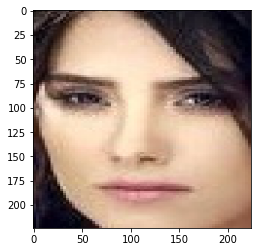

In [20]:
img = load_img(img_path, target_size = (size, size, 3))
plt.imshow(img)

In [21]:
img = img_to_array(img)

In [22]:
img

array([[[ 17.,  12.,   9.],
        [ 17.,  12.,   9.],
        [ 17.,  12.,   9.],
        ...,
        [ 17.,  13.,  27.],
        [ 17.,  13.,  27.],
        [ 17.,  13.,  27.]],

       [[ 17.,  12.,   9.],
        [ 17.,  12.,   9.],
        [ 17.,  12.,   9.],
        ...,
        [ 17.,  13.,  27.],
        [ 17.,  13.,  27.],
        [ 17.,  13.,  27.]],

       [[ 39.,  34.,  31.],
        [ 39.,  34.,  31.],
        [ 39.,  34.,  31.],
        ...,
        [ 14.,  10.,  24.],
        [ 14.,  10.,  24.],
        [ 14.,  10.,  24.]],

       ...,

       [[  2.,   0.,  14.],
        [  2.,   0.,  14.],
        [  2.,   0.,  14.],
        ...,
        [143.,  92.,  71.],
        [143.,  92.,  71.],
        [143.,  92.,  71.]],

       [[  1.,   0.,  13.],
        [  1.,   0.,  13.],
        [  1.,   0.,  13.],
        ...,
        [145.,  94.,  73.],
        [145.,  94.,  73.],
        [145.,  94.,  73.]],

       [[  1.,   0.,  13.],
        [  1.,   0.,  13.],
        [  1.,  

In [34]:
img = img/255.0

In [33]:
img = img.reshape(1, size, size, 3)

In [31]:
img.shape

(1, 224, 224, 3)

In [30]:
model.predict(img)

array([[0.00045983]], dtype=float32)

In [63]:
def get_classes(data):
  prob = model.predict(data)[0][0]

  if prob<=0.5:
    return 'female', (1-prob)
  else:
    return 'male', prob


In [64]:
get_classes(img)

('male', 0.9459448)

In [48]:
!pip install Ipython

In [65]:
from IPython.display import display, Javascript
from google.colab.output  import eval_js
from base64 import b64decode

In [66]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

saved to photo.jpg


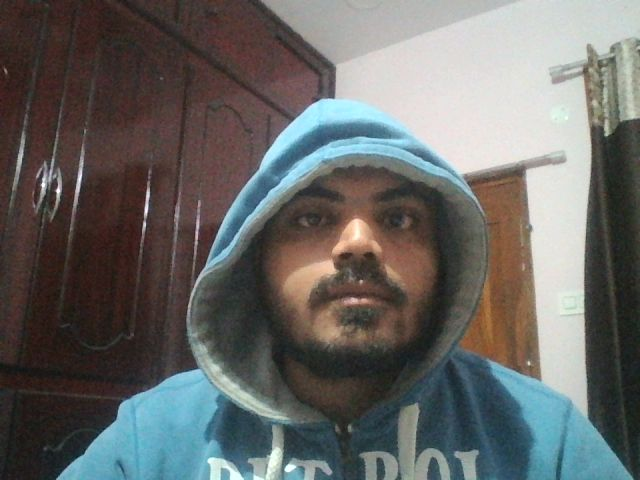

In [73]:
from IPython.display import Image
try:
  filename = take_photo()
  print('saved to {}'.format(filename))
  display(Image(filename))
except Exception as err:
  print(str(err))


In [74]:
def get_prediction(img_path):
  img = load_img(img_path, target_size=(size, size, 3))
  plt.imshow(img)
  img = img_to_array(img)
  img = img/255.0
  img = img.reshape(1, size, size, 3)

  pred, prob = get_classes(img)
  return pred, prob

('male', 0.9707474)

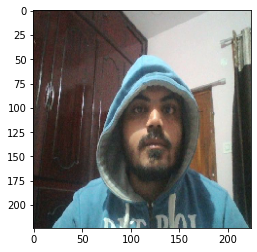

In [75]:
get_prediction('/content/photo.jpg')